In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)

clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview

mouse_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume = mouse_data_df.groupby(["Drug", "Timepoint"])
tumor_mean = tumor_volume["Tumor Volume (mm3)"].mean()

# # Convert to DataFrame
tumor_volume_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_mean})

# Preview DataFrame
tumor_volume_df.head(15)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(tumor_volume["Tumor Volume (mm3)"].sem())

sem_tumor_volume.columns = sem_tumor_volume.columns.get_level_values(0)

# Preview DataFrame
sem_tumor_volume.head(20)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_df = tumor_volume_df.unstack('Drug')
tumor_volume_df.columns


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [8]:
reduced_tumor_volume_df = tumor_volume_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# Preview that Reformatting worked
reduced_tumor_volume_df.head()

Drug                          Capomulin  Infubinol   Ketapril    Placebo
                   Timepoint                                            
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000
                   5          44.266086  47.062001  47.389175  47.125589
                   10         43.084291  49.403909  49.582269  49.423329
                   15         42.064317  51.296397  52.399974  51.359742
                   20         40.716325  53.197691  54.920935  54.364417

In [11]:
# Minor Data Munging to Re-Format the Data Frames
sem_tumor_volume = sem_tumor_volume.unstack('Drug')
sem_tumor_volume.columns


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [12]:
reduced_sem_tumor_volume = sem_tumor_volume[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# Preview that Reformatting worked
reduced_sem_tumor_volume.head()

Drug                          Capomulin  Infubinol  Ketapril   Placebo
                   Timepoint                                          
Tumor Volume (mm3) 0           0.000000   0.000000  0.000000  0.000000
                   5           0.448593   0.235102  0.264819  0.218091
                   10          0.702684   0.282346  0.357421  0.402064
                   15          0.838617   0.357705  0.580268  0.614461
                   20          0.909731   0.476210  0.726484  0.839609

TypeError: ('Tumor Volume (mm3)', 0) is not a string

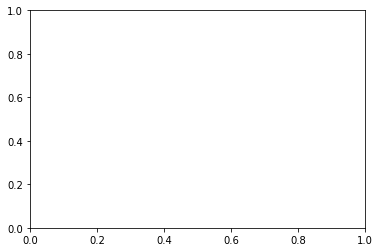

In [17]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

for column in reduced_tumor_volume_df:
    ax.errorbar(reduced_tumor_volume_df.index, reduced_tumor_volume_df[column], yerr=reduced_sem_tumor_volume[column])

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor Response to Treament")
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_metastatic = tumor_volume["Metastatic Sites"].mean()

# # Convert to DataFrame
mean_metastatic_df = pd.DataFrame({"Metastatic Sites": mean_metastatic})


# Preview DataFrame
mean_metastatic_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
sem_metastatic_df = pd.DataFrame(tumor_volume["Metastatic Sites"].sem())

sem_metastatic_df.columns = sem_metastatic_df.columns.get_level_values(0)


# Preview DataFrame
sem_metastatic_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_df = mean_metastatic_df.unstack('Drug')

# Preview that Reformatting worked
mean_metastatic_df.head()


In [ ]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

for column in mean_metastatic_df:
    ax.errorbar(mean_metastatic_df.index, mean_metastatic_df[column], yerr=sem_metastatic_df[column])

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title ("Metastatic Spread During Treatment")
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)